In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("E:\HackerearthHappiness\data_happiness\ctrain.csv")

In [3]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [32]:
CountStatus_browser = pd.value_counts(df['Browser_Used'].values, sort=True)

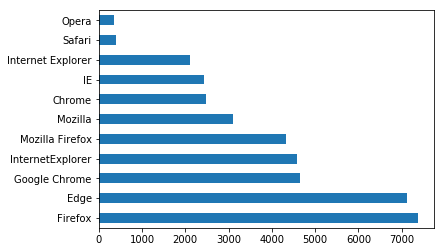

In [33]:
CountStatus_browser.plot.barh()

In [34]:
CountStatus_device = pd.value_counts(df['Device_Used'].values, sort=True)

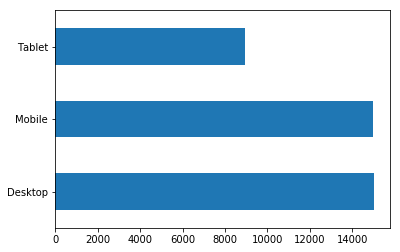

In [35]:
CountStatus_device.plot.barh()

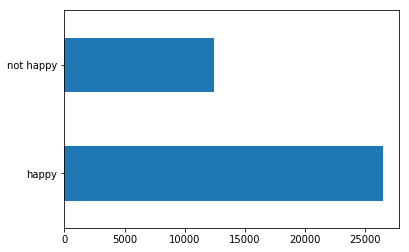

In [91]:
CountStatus_device = pd.value_counts(df['Is_Response'].values, sort=True)
CountStatus_device.plot.barh()

In [92]:
df['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [40]:
train = df['Description']

In [47]:
conditions = [
    (df['Is_Response'] == 'not happy') ,
    (df['Is_Response'] == 'happy') 
    
]
choices = [0,1]
df['res'] = np.select(conditions, choices)

In [49]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,res
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,1
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0


In [50]:
test = df['res']

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [55]:
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform([r for r in X_train])
test_features = vectorizer.transform([r for r in X_test])


In [56]:
nb = MultinomialNB()
nb.fit(train_features, [result for result in y_train])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
predictions = nb.predict(test_features)

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
print("Multinomial naive bayes AUC: {0}".format(metrics.auc(fpr, tpr)))

Multinomial naive bayes AUC: 0.828094260305


In [66]:
val_test_df = pd.read_csv("E:\HackerearthHappiness\data_happiness\ctest.csv")

In [69]:
val_test = val_test_df['Description']

In [70]:
val_test_features = vectorizer.transform([r for r in val_test_features])

In [71]:
val_predictions = nb.predict(val_test_features)

In [72]:
val_predictions

array([0, 1, 1, ..., 1, 1, 1])

In [79]:
result = pd.DataFrame({'Is_Response_value':val_predictions})

In [80]:
conditions = [
    (result['Is_Response_value'] == 0) ,
    (result['Is_Response_value'] == 1) 
    
]
choices = ['not happy','happy']
result['Is_Response'] = np.select(conditions, choices)

In [83]:
final_result = pd.concat([test_df,result], axis=1)

In [85]:
final_upload = final_result[['User_ID','Is_Response']]

In [86]:
final_upload

,User_ID,Is_Response
0,id80132,not happy
1,id80133,happy
2,id80134,happy
3,id80135,not happy
4,id80136,happy
5,id80137,happy
6,id80138,happy
7,id80139,not happy
8,id80140,happy
9,id80141,happy


In [90]:
path=r'E:\HackerearthHappiness\ '

final_upload.to_csv(path+'result1.csv',index = None)